In [5]:
lgg_dataset_dir = '../../../Dataset/LGGSegmentationDataset/archive/kaggle_3m'

# File path line length images for later sorting
BASE_LEN = 89 # len(/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_ <-!!!43.tif)
END_IMG_LEN = 4 # len(/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->.tif)
END_MASK_LEN = 9 # (/kaggle/input/lgg-mri-segmentation/kaggle_3m/TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_43 !!!->_mask.tif)

# img size
IMG_SIZE = 512

In [6]:
# The dataset consist of .tif images, which are 3D images (each image = a slice).

In [7]:
import os
import numpy as np
import cv2 as cv
import tensorflow as tf
from glob import glob
from PIL import Image
import matplotlib.pylab as plt
import nibabel as nib

plt.style.use("dark_background")


In [8]:
# Ref : https://www.kaggle.com/code/bonhart/brain-mri-data-visualization-unet-fpn

In [9]:
lgg_training_files = []

for root, folder_name, file_names in os.walk(lgg_dataset_dir):
    for file_name in file_names:
        file_path = os.path.join(root, file_name)
        lgg_training_files.append(file_path)

In [10]:
print('num of images: ', len(lgg_training_files))

num of images:  7860


In [11]:
print(lgg_training_files[1001])

../../../Dataset/LGGSegmentationDataset/archive/kaggle_3m\TCGA_DU_5853_19950823\TCGA_DU_5853_19950823_35.tif


shape of image:  (256, 256)


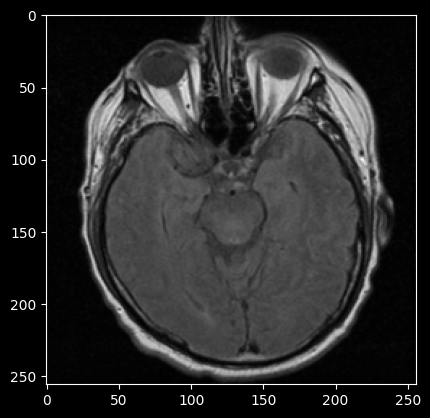

In [22]:
img =  cv.imread(lgg_training_files[3], cv.IMREAD_GRAYSCALE)
img = np.reshape(img, (256, 256))  # Reshape to 256x256
print('shape of image: ', img.shape)
plt.imshow(img, cmap='gray')

In [13]:
# Now, visualizing the segmentation masks
print(lgg_training_files[6])

../../../Dataset/LGGSegmentationDataset/archive/kaggle_3m\TCGA_CS_4941_19960909\TCGA_CS_4941_19960909_11_mask.tif


In [14]:
img =  Image.open(lgg_training_files[6])
print('shape of image: ', img.size)

shape of image:  (256, 256)


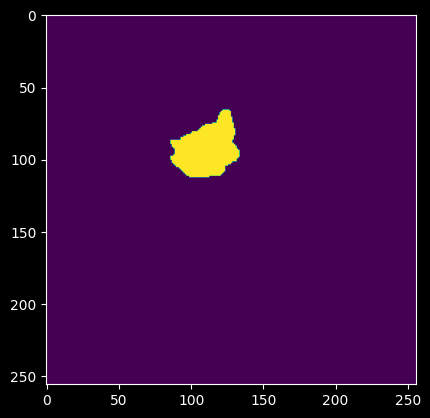

In [15]:
plt.imshow(img)